Setup complete. Libraries imported and styles configured.

Generated 1500 samples with 3 classes.
Training set size: 1050 samples.
Testing set size: 450 samples.
Classes: [0 1 2]
Feature shape: (1050, 2)

--- Visualizing Clean Training Data ---


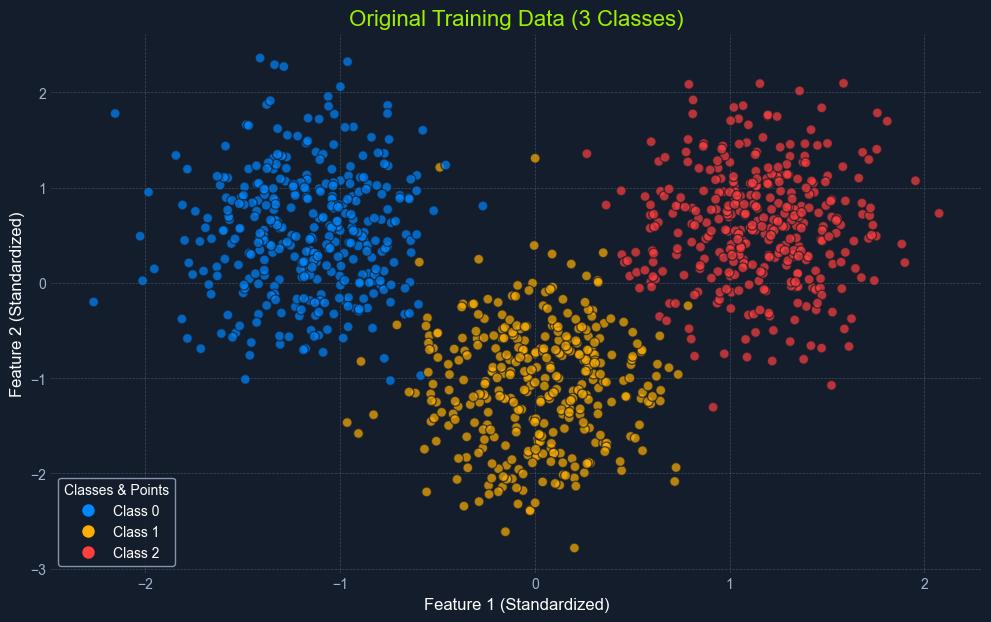

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.multiclass import OneVsRestClassifier
import seaborn as sns

# Color palette
htb_green = "#9fef00"
node_black = "#141d2b"
hacker_grey = "#a4b1cd"
white = "#ffffff"
azure = "#0086ff"       # Class 0
nugget_yellow = "#ffaf00" # Class 1
malware_red = "#ff3e3e"    # Class 2
vivid_purple = "#9f00ff"   # Highlight/Accent
aquamarine = "#2ee7b6"   # Highlight/Accent

# Configure plot styles
plt.style.use("seaborn-v0_8-darkgrid")
plt.rcParams.update(
    {
        "figure.facecolor": node_black,
        "axes.facecolor": node_black,
        "axes.edgecolor": hacker_grey,
        "axes.labelcolor": white,
        "text.color": white,
        "xtick.color": hacker_grey,
        "ytick.color": hacker_grey,
        "grid.color": hacker_grey,
        "grid.alpha": 0.1,
        "legend.facecolor": node_black,
        "legend.edgecolor": hacker_grey,
        "legend.frameon": True,
        "legend.framealpha": 0.8, # Slightly transparent legend background
        "legend.labelcolor": white,
        "figure.figsize": (12, 7), # Default figure size
    }
)

# Seed for reproducibility - MUST BE 1337
SEED = 1337
np.random.seed(SEED)

print("Setup complete. Libraries imported and styles configured.")

# Generate 3-class synthetic data
n_samples = 1500
centers_3class = [(0, 6), (4, 3), (8, 6)]  # Centers for three blobs
X_3c, y_3c = make_blobs(
    n_samples=n_samples,
    centers=centers_3class,
    n_features=2,
    cluster_std=1.15, # Standard deviation of clusters
    random_state=SEED,
)

# Standardize features
scaler = StandardScaler()
X_3c_scaled = scaler.fit_transform(X_3c)

# Split data into training and testing sets, stratifying by class
X_train_3c, X_test_3c, y_train_3c, y_test_3c = train_test_split(
    X_3c_scaled, y_3c, test_size=0.3, random_state=SEED, stratify=y_3c
)

print(f"\nGenerated {n_samples} samples with 3 classes.")
print(f"Training set size: {X_train_3c.shape[0]} samples.")
print(f"Testing set size: {X_test_3c.shape[0]} samples.")
print(f"Classes: {np.unique(y_3c)}")
print(f"Feature shape: {X_train_3c.shape}")

def plot_data_multi(
    X,
    y,
    title="Multi-Class Dataset Visualization",
    highlight_indices=None,
    highlight_markers=None,
    highlight_colors=None,
    highlight_labels=None,
):
    """
    Plots a 2D multi-class dataset with class-specific colors and optional highlighting.
    Automatically ensures points marked with 'P' are plotted above all others.

    Args:
        X (np.ndarray): Feature data (n_samples, 2).
        y (np.ndarray): Labels (n_samples,).
        title (str): The title for the plot.
        highlight_indices (list | np.ndarray, optional): Indices of points in X to highlight. Defaults to None.
        highlight_markers (list, optional): Markers for highlighted points (recycled if shorter).
                                          Points with marker 'P' will be plotted on top. Defaults to ['o'].
        highlight_colors (list, optional): Edge colors for highlighted points (recycled). Defaults to [vivid_purple].
        highlight_labels (list, optional): Labels for highlighted points legend (recycled). Defaults to [''].
    """
    plt.figure(figsize=(12, 7))
    # Define colors based on the global palette for classes 0, 1, 2 (or more if needed)
    class_colors = [
        azure,
        nugget_yellow,
        malware_red,
    ]  # Extend if you have more than 3 classes
    unique_classes = np.unique(y)
    max_class_idx = np.max(unique_classes) if len(unique_classes) > 0 else -1
    if max_class_idx >= len(class_colors):
        print(
            f"{malware_red}Warning:{white} More classes ({max_class_idx + 1}) than defined colors ({len(class_colors)}). Using fallback color."
        )
        class_colors.extend([hacker_grey] * (max_class_idx + 1 - len(class_colors)))

    cmap_multi = plt.cm.colors.ListedColormap(class_colors)

    # Plot all non-highlighted points first
    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        cmap=cmap_multi,
        edgecolors=node_black,
        s=50,
        alpha=0.7,
        zorder=1,  # Base layer
    )

    # Plot highlighted points on top if specified
    highlight_handles = []
    if highlight_indices is not None and len(highlight_indices) > 0:
        num_highlights = len(highlight_indices)
        # Provide defaults if None
        _highlight_markers = (
            highlight_markers
            if highlight_markers is not None
            else ["o"] * num_highlights
        )
        _highlight_colors = (
            highlight_colors
            if highlight_colors is not None
            else [vivid_purple] * num_highlights
        )
        _highlight_labels = (
            highlight_labels if highlight_labels is not None else [""] * num_highlights
        )

        for i, idx in enumerate(highlight_indices):
            if not (0 <= idx < X.shape[0]):
                print(
                    f"{malware_red}Warning:{white} Invalid highlight index {idx} skipped."
                )
                continue

            # Determine marker, edge color, and label for this point
            marker = _highlight_markers[i % len(_highlight_markers)]
            edge_color = _highlight_colors[i % len(_highlight_colors)]
            label = _highlight_labels[i % len(_highlight_labels)]

            # Determine face color based on the point's true class
            point_class = y[idx]
            try:
                face_color = class_colors[int(point_class)]
            except (IndexError, TypeError):
                print(
                    f"{malware_red}Warning:{white} Class index '{point_class}' invalid. Using fallback."
                )
                face_color = hacker_grey

            current_zorder = (
                3 if marker == "P" else 2
            )  # If marker is 'P', use zorder 3, else 2

            # Plot the highlighted point
            plt.scatter(
                X[idx, 0],
                X[idx, 1],
                facecolors=face_color,
                edgecolors=edge_color,
                marker=marker,  # Use the determined marker
                s=180,
                linewidths=2,
                alpha=1.0,
                zorder=current_zorder,  # Use the zorder determined by the marker
            )
            # Create legend handle if label exists
            if label:
                highlight_handles.append(
                    plt.Line2D(
                        [0],
                        [0],
                        marker=marker,
                        color="w",
                        label=label,
                        markerfacecolor=face_color,
                        markeredgecolor=edge_color,
                        markersize=10,
                        linestyle="None",
                        markeredgewidth=1.5,
                    )
                )

    plt.title(title, fontsize=16, color=htb_green)
    plt.xlabel("Feature 1 (Standardized)", fontsize=12)
    plt.ylabel("Feature 2 (Standardized)", fontsize=12)

    # Create class legend handles
    class_handles = []
    unique_classes_present = sorted(np.unique(y))
    for class_idx in unique_classes_present:
        try:
            int_class_idx = int(class_idx)
            class_handles.append(
                plt.Line2D(
                    [0],
                    [0],
                    marker="o",
                    color="w",
                    label=f"Class {int_class_idx}",
                    markersize=10,
                    markerfacecolor=class_colors[int_class_idx],
                    markeredgecolor=node_black,
                    linestyle="None",
                )
            )
        except (IndexError, TypeError):
            print(
                f"{malware_red}Warning:{white} Cannot create legend entry for class {class_idx}."
            )

    # Combine legends
    all_handles = class_handles + highlight_handles
    if all_handles:
        plt.legend(handles=all_handles, title="Classes & Points")

    plt.grid(True, color=hacker_grey, linestyle="--", linewidth=0.5, alpha=0.3)
    plt.show()


# Plot the initial clean training data
print("\n--- Visualizing Clean Training Data ---")
plot_data_multi(X_train_3c, y_train_3c, title="Original Training Data (3 Classes)")

In [3]:
print("\n--- Training Baseline Model ---")
# Initialize the base estimator
# Using 'liblinear' solver as it's good for smaller datasets and handles OvR well.
# C=1.0 is the default inverse regularization strength.
base_estimator = LogisticRegression(random_state=SEED, C=1.0, solver="liblinear")

# Initialize the OneVsRestClassifier wrapper using the base estimator
baseline_model_3c = OneVsRestClassifier(base_estimator)

# Train the OvR model on the clean training data
baseline_model_3c.fit(X_train_3c, y_train_3c)
print("Baseline OvR model trained successfully.")

# Predict on the clean test set to evaluate baseline performance
y_pred_baseline_3c = baseline_model_3c.predict(X_test_3c)

# Calculate baseline accuracy
baseline_accuracy_3c = accuracy_score(y_test_3c, y_pred_baseline_3c)
print(f"Baseline 3-Class Model Accuracy on Test Set: {baseline_accuracy_3c:.4f}")

# Prepare meshgrid for plotting decision boundaries
# We create a grid of points covering the feature space
h = 0.02  # Step size in the mesh
x_min, x_max = X_train_3c[:, 0].min() - 1, X_train_3c[:, 0].max() + 1
y_min, y_max = X_train_3c[:, 1].min() - 1, X_train_3c[:, 1].max() + 1
xx_3c, yy_3c = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Combine xx and yy into pairs of coordinates for prediction
mesh_points_3c = np.c_[xx_3c.ravel(), yy_3c.ravel()]

# Predict classes for each point on the meshgrid using the trained baseline model
Z_baseline_3c = baseline_model_3c.predict(mesh_points_3c)
# Reshape the predictions back into the grid shape for contour plotting
Z_baseline_3c = Z_baseline_3c.reshape(xx_3c.shape)
print("Meshgrid predictions generated for baseline model.")

# Extract baseline model parameters (weights w_k and intercepts b_k)
# The fitted OvR classifier stores its individual binary estimators in the `estimators_` attribute
try:
    if (
        hasattr(baseline_model_3c, "estimators_")
        and len(baseline_model_3c.estimators_) == 3
    ):
        estimators_base = baseline_model_3c.estimators_
        # For binary LogisticRegression with liblinear, coef_ is shape (1, n_features) and intercept_ is (1,)
        # We extract them for each of the 3 binary classifiers (0 vs Rest, 1 vs Rest, 2 vs Rest)
        w0_base = estimators_base[0].coef_[0]  # Weight vector for class 0 vs Rest
        b0_base = estimators_base[0].intercept_[0]  # Intercept for class 0 vs Rest
        w1_base = estimators_base[1].coef_[0]  # Weight vector for class 1 vs Rest
        b1_base = estimators_base[1].intercept_[0]  # Intercept for class 1 vs Rest
        w2_base = estimators_base[2].coef_[0]  # Weight vector for class 2 vs Rest
        b2_base = estimators_base[2].intercept_[0]  # Intercept for class 2 vs Rest
        print(
            "Baseline model parameters (w0, b0, w1, b1, w2, b2) extracted successfully."
        )
    else:
        # This might happen if the model didn't fit correctly or classes were dropped
        raise RuntimeError(
            "Could not extract expected number of estimators from baseline OvR model."
        )
except Exception as e:
    print(f"Error: Failed to extract baseline parameters: {e}")


--- Training Baseline Model ---
Baseline OvR model trained successfully.
Baseline 3-Class Model Accuracy on Test Set: 0.9600
Meshgrid predictions generated for baseline model.
Baseline model parameters (w0, b0, w1, b1, w2, b2) extracted successfully.



--- Visualizing Baseline Model Decision Boundaries ---


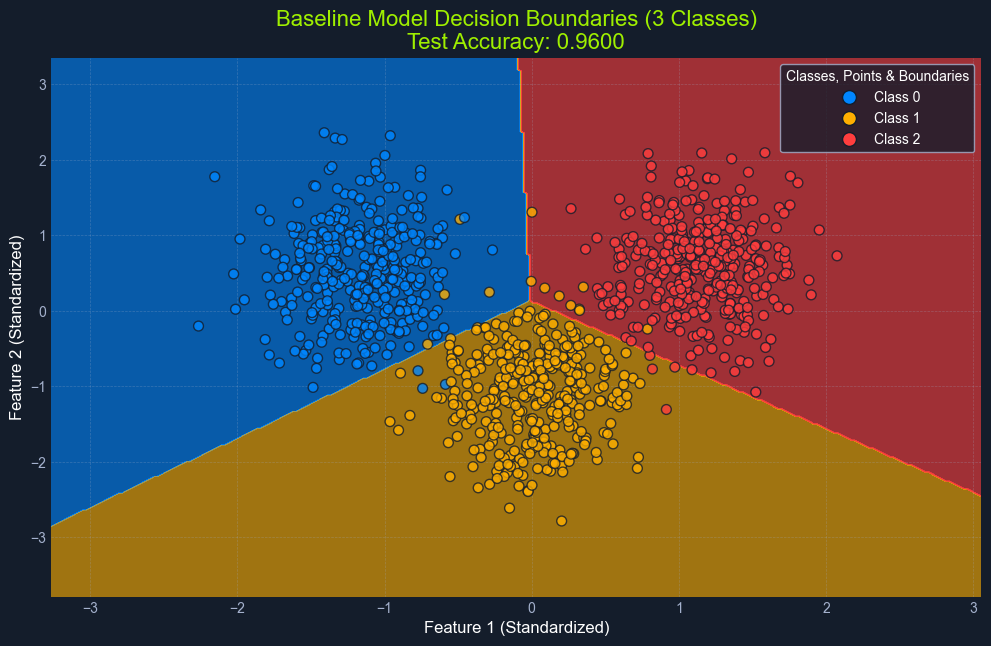

In [4]:
def plot_decision_boundary_multi(
    X,
    y,
    Z_mesh,
    xx_mesh,
    yy_mesh,
    title="Decision Boundary",
    highlight_indices=None,
    highlight_markers=None,
    highlight_colors=None,
    highlight_labels=None,
):
    """
    Plots the decision boundary regions and data points for a multi-class classifier.
    Automatically ensures points marked with 'P' are plotted above other points.
    Explicit boundary lines are masked to only show in relevant background regions.

    Args:
        X (np.ndarray): Feature data for scatter plot (n_samples, 2).
        y (np.ndarray): Labels for scatter plot (n_samples,).
        Z_mesh (np.ndarray): Predicted classes on the meshgrid (shape matching xx_mesh).
        xx_mesh (np.ndarray): Meshgrid x-coordinates.
        yy_mesh (np.ndarray): Meshgrid y-coordinates.
        title (str): Plot title.
        highlight_indices (list | np.ndarray, optional): Indices of points in X to highlight.
        highlight_markers (list, optional): Markers for highlighted points.
                                          Points with marker 'P' will be plotted on top.
        highlight_colors (list, optional): Edge colors for highlighted points.
        highlight_labels (list, optional): Labels for highlighted points legend.
        boundary_lines (dict, optional): Dict specifying boundary lines to plot, e.g.,
            {'label': {'coeffs': (w_diff_x, w_diff_y), 'intercept': b_diff, 'color': 'color', 'style': 'linestyle'}}
    """
    plt.figure(figsize=(12, 7))  # Consistent figure size

    # Define base class colors and slightly transparent ones for contour fill
    class_colors = [azure, nugget_yellow, malware_red]  # Extend if more classes as needed
    # Add fallback colors if needed based on y and Z_mesh
    unique_classes_y = np.unique(y)
    max_class_idx_y = np.max(unique_classes_y) if len(unique_classes_y) > 0 else -1
    unique_classes_z = np.unique(Z_mesh)
    max_class_idx_z = np.max(unique_classes_z) if len(unique_classes_z) > 0 else -1
    max_class_idx = int(max(max_class_idx_y, max_class_idx_z))  # Ensure integer type

    if max_class_idx >= len(class_colors):
        print(
            f"Warning: More classes ({max_class_idx + 1}) than defined colors ({len(class_colors)}). Using fallback grey."
        )
        # Ensure enough colors exist for indexing up to max_class_idx
        needed_colors = max_class_idx + 1
        current_colors = len(class_colors)
        if current_colors < needed_colors:
            class_colors.extend([hacker_grey] * (needed_colors - current_colors))

    # Appending '60' provides approx 37% alpha in hex RGBA for contour map
    # Ensure colors used for cmap match the number of classes exactly
    light_colors = [
        c + "60" if len(c) == 7 and c.startswith("#") else c
        for c in class_colors[: max_class_idx + 1]
    ]
    cmap_light = plt.cm.colors.ListedColormap(light_colors)

    # Plot the decision boundary contour fill
    plt.contourf(
        xx_mesh,
        yy_mesh,
        Z_mesh,
        cmap=cmap_light,
        alpha=0.6,
        zorder=0,  # Ensure contour is lowest layer
    )

    # Plot the data points
    # Ensure cmap for points matches number of classes in y
    cmap_bold = (
        plt.cm.colors.ListedColormap(class_colors[: int(max_class_idx_y) + 1])
        if max_class_idx_y >= 0
        else plt.cm.colors.ListedColormap(class_colors[:1])
    )
    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        cmap=cmap_bold,
        edgecolors=node_black,
        s=50,
        alpha=0.8,
        zorder=1,  # Points above contour
    )

    # Plot highlighted points if any
    highlight_handles = []
    if highlight_indices is not None and len(highlight_indices) > 0:
        num_highlights = len(highlight_indices)
        # Provide defaults if None
        _highlight_markers = (
            highlight_markers
            if highlight_markers is not None
            else ["o"] * num_highlights
        )
        _highlight_colors = (
            highlight_colors
            if highlight_colors is not None
            else [vivid_purple] * num_highlights
        )
        _highlight_labels = (
            highlight_labels if highlight_labels is not None else [""] * num_highlights
        )

        for i, idx in enumerate(highlight_indices):
            # Check index validity gracefully
            if not (0 <= idx < X.shape[0]):
                print(
                    f"Warning: Invalid highlight index {idx} skipped."
                )
                continue

            # Determine marker, edge color, and label for this point
            marker = _highlight_markers[i % len(_highlight_markers)]  # Get the marker
            edge_color = _highlight_colors[i % len(_highlight_colors)]
            label = _highlight_labels[i % len(_highlight_labels)]

            # Determine face color based on the point's true class from y
            try:
                # Ensure point_class is a valid integer index for class_colors
                point_class = int(y[idx])
                if not (0 <= point_class < len(class_colors)):
                    raise IndexError
                face_color = class_colors[point_class]
            except (IndexError, ValueError, TypeError):
                print(
                    f"Warning: Class index '{y[idx]}' invalid for highlighted point {idx}. Using fallback."
                )
                face_color = hacker_grey  # Fallback

            current_zorder = (
                3 if marker == "P" else 2
            )  # If marker is 'P', use zorder 3, else 2

            # Plot the highlighted point
            plt.scatter(
                X[idx, 0],
                X[idx, 1],
                facecolors=face_color,
                edgecolors=edge_color,
                marker=marker,  # Use the determined marker
                s=180,
                linewidths=2,
                alpha=1.0,  # Make highlighted points fully opaque
                zorder=current_zorder,  # Use the zorder determined by the marker
            )
            # Create legend handle if label exists
            if label:
                # Use Line2D for better control over legend marker appearance
                highlight_handles.append(
                    plt.Line2D(
                        [0],
                        [0],
                        marker=marker,
                        color="w",
                        label=label,
                        markerfacecolor=face_color,
                        markeredgecolor=edge_color,
                        markersize=10,
                        linestyle="None",
                        markeredgewidth=1.5,
                    )
                )

    plt.title(title, fontsize=16, color=htb_green)
    plt.xlabel("Feature 1 (Standardized)", fontsize=12)
    plt.ylabel("Feature 2 (Standardized)", fontsize=12)

    # Create class legend handles (based on unique classes in y)
    class_handles = []
    # Check if y is not empty before finding unique classes
    if y.size > 0:
        unique_classes_present_y = sorted(np.unique(y))
        for class_idx in unique_classes_present_y:
            try:
                int_class_idx = int(class_idx)
                # Check if index is valid for the potentially extended class_colors
                if 0 <= int_class_idx < len(class_colors):
                    class_handles.append(
                        plt.Line2D(
                            [0],
                            [0],
                            marker="o",
                            color="w",
                            label=f"Class {int_class_idx}",
                            markersize=10,
                            markerfacecolor=class_colors[int_class_idx],
                            markeredgecolor=node_black,
                            linestyle="None",
                        )
                    )
                else:
                    print(
                        f"Warning: Cannot create class legend entry for class {int_class_idx}, color index out of bounds after potential extension."
                    )
            except (ValueError, TypeError):
                print(
                    f"Warning: Cannot create class legend entry for non-integer class {class_idx}."
                )
    else:
        print(
            f"Info: No data points (y is empty), skipping class legend entries."
        )

    # Combine legends
    all_handles = class_handles + highlight_handles
    if all_handles:  # Only show legend if there's something to legend
        plt.legend(handles=all_handles, title="Classes, Points & Boundaries")

    plt.grid(True, color=hacker_grey, linestyle="--", linewidth=0.5, alpha=0.3)
    # Ensure plot limits strictly match the meshgrid range used for contourf
    plt.xlim(xx_mesh.min(), xx_mesh.max())
    plt.ylim(yy_mesh.min(), yy_mesh.max())
    plt.show()


# Plot the decision boundary for the baseline model using the pre-calculated Z_baseline_3c
print("\n--- Visualizing Baseline Model Decision Boundaries ---")
plot_decision_boundary_multi(
    X_train_3c,  # Training data points
    y_train_3c,  # Training labels
    Z_baseline_3c,  # Meshgrid predictions from baseline model
    xx_3c,  # Meshgrid x coordinates
    yy_3c,  # Meshgrid y coordinates
    title=f"Baseline Model Decision Boundaries (3 Classes)\nTest Accuracy: {baseline_accuracy_3c:.4f}",
)